In [1]:
from main import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Data inputing

Input equation type:
1. Parallel Directions Method
2. Fractional Steps Method

In [2]:
k = int(input())
if k == 1:
    equation_type = 'parallelDirections'
else:
    equation_type = 'fractionalSteps'
print(f'Selected: {equation_type}')

1
Selected: parallelDirections


Input nx - number of x > 0 (recommended: 40)

In [3]:
nx = int(input())

40


Input ny - number of y > 0 (recommended: 40)

In [4]:
ny = int(input())

40


Input T - max t > 0 (recommended: 5)

In [5]:
T = int(input())

5


Input K - number of t > 0 (recommended: 200)

In [6]:
K = int(input())

200


Вариант 7:
$$
\begin{align}
\frac {\partial{u}} {\partial{t}} = \frac {\partial^2{u}} {\partial{x^2}} + \frac {\partial^2{u}} {\partial{y^2}} -x \cdot y \cdot sin(t), \\
u(0, y, t) = 0 \\
u(1, y, t) = y \cdot cos(t) \\
u(x, 0, t) = 0 \\
u(x, 1, t) = x \cdot cos(t) \\
u(x, y, 0) = x \cdot y
\end{align}
$$

Аналитическое решение:
\begin{align}
U(x, y, t) = x \cdot y \cdot cos(t)
\end{align}

In [8]:
params = {
    'a': 1,
    'b': 1,
    'c': 0,
    'd': 0,
    'lx': 1,
    'ly': 1,
    'f': lambda x, y, t: - x * y * np.sin(t),
    'alpha1': 0,
    'alpha2': 1,
    'beta1': 0,
    'beta2': 1,
    'gamma1': 0,
    'gamma2': 1,
    'delta1': 0,
    'delta2': 1,
    'phi11': lambda y, t: 0,
    'phi12': lambda y, t: y * np.cos(t),
    'phi21': lambda x, t: 0,
    'phi22': lambda x, t: x * np.cos(t),
    'psi': lambda x, y: x * y,
    'solution': lambda x, y, t: x * y * np.cos(t),
}

In [9]:
solver = ParabolicSolver(params, equation_type)

In [10]:
solved = solver.solve(nx, ny, T, K)
ans = {
    'numerical': solved,
    'analytic': solver.analyticSolve(nx, ny, T, K)
}

In [40]:
def draw_u_x(dict_, nx, ny, T, K, time, save_file="plot_u_x.png"):
    fig = plt.figure()
    hx = 1 / nx
    hy = 1 / ny
    tau = T / K
    
    x = np.arange(0, 1 + hx, hx)
    y = np.arange(0, 1 + hy, hy)
    t = np.arange(0, T + tau, tau)
    
#     z1 = np.array(dict_['numerical'])
#     z2 = np.array(dict_['analytic'])
    
    z1 = []
    for i in range(len(x)):
        z1.append(approximation(x, 10, time, dict_))
    
    z2 = solving(x, y[10], t[time])

    plt.title('U from x')
    plt.plot(x, z1[time], color='r', label='numerical')
#     print(x)
#     print(z1)
    plt.plot(x, z2, color='b', label='analytic')
    plt.legend(loc='best')
    plt.ylabel('U')
    plt.xlabel('x')
    plt.savefig(save_file)
    plt.show()
    
    err = []
    print(f"len={len(z1[time])}\n{z1[time]}")
    print()
    print(f"len={len(z2)}\n{z2}")
    for i in range(len(z1[time])):
        err.append(compareError(z1[time], z2))
    plt.title('Error from y')
    plt.plot(y, err, color='b', label='err')
    plt.legend(loc='best')
    plt.ylabel('Err')
    plt.xlabel('t')
    plt.savefig('err.png')
    plt.show()

Time check

In [48]:
print(f'Select time from 0 to {nx - 1}')
curr_time = int(input())

Select time from 0 to 39
1


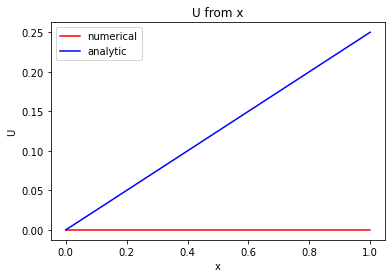

len=41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

len=41
[0.0, 0.006248046976723142, 0.012496093953446284, 0.018744140930169427, 0.024992187906892567, 0.031240234883615707, 0.037488281860338854, 0.043736328837061994, 0.049984375813785134, 0.056232422790508274, 0.062480469767231414, 0.06872851674395455, 0.07497656372067771, 0.08122461069740083, 0.08747265767412399, 0.09372070465084711, 0.09996875162757027, 0.10621679860429341, 0.11246484558101655, 0.11871289255773969, 0.12496093953446283, 0.13120898651118598, 0.1374570334879091, 0.14370508046463226, 0.14995312744135542, 0.15620117441807854, 0.16244922139480167, 0.16869726837152482, 0.17494531534824798, 0.18119336232497113, 0.18744140930169423, 0.19368945627841738, 0.19993750325514054, 0.2061855502318637, 0.21243359720858682, 0.21868164418530994, 0.2249296911620331, 0.23117773

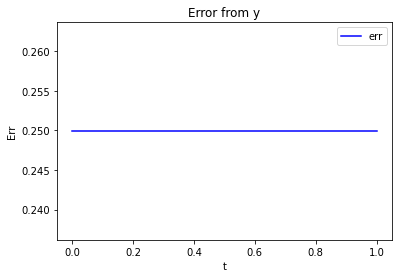

In [49]:
draw_u_x(ans, nx, ny, T, K, curr_time)